# <center>EDA (Exploratory Data Analisys) Pre Modeling</center>

# 1. Prepare Module and Dataset

In [19]:
import pandas as pd
import numpy as np 

#Statistics Module 
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import anderson, shapiro
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from scipy import stats
import pylab
from collections import Counter

# Check Normalization of the Data
from statsmodels.graphics.gofplots import qqplot

#visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
sns.set(style='darkgrid')

## Load Dataset 

In [20]:
# Regression dataset
df = pd.read_csv('House Price.csv')

# Forecesting Dataset 
df_forecasting = pd.read_csv('currency.csv')

## 1.1. Preview Dataset

In [21]:
#preview dataset
def preview_df(df):
    print('1.Top 10 Record Data : ',df.head(10),'\n')
    print('='*100)
    print('2.Demensional Data :',df.shape,'\n')
    print('='*100)
    print('3.Descriptive of Data : ',df.describe(),'\n')
    print('='*100)
    print('4.Data Info : ',df.info(),'\n')   
    print('='*100)
    print('5.Types of dataset :',df.dtypes,'\n')
    print('='*100)
    
preview_df(df)

1.Top 10 Record Data :     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   

In [22]:
# Statistics Descriptive
def Describe(df,col=None):
    '''
    Documentation :
    --------------
    * df  : Dataframe Name
    * col : Columns Name    
    '''
    if col is None :
        describe = df.describe()
    else:
        describe = df[col].describe()
        
    return describe

In [23]:
Describe(df)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 1.2. Seperate Feature (Numerical and Categorical)

In [24]:
# Seperate the features based on types of data
# Make a list for both of the data type 
categorical_list = []
numerical_list = []
# module
def dtypes_1(df):
    '''
    Documentation :
    --------------
    * df : Dataframe name 
    
    Step :
    * 1. Do iteration for each feature to define which one categorical and nummerical feature. 
    * 2. Columns in dataframe will be seperated based on the dtypes
    * 3. All of the column will be entered to the list that have been created
    '''
    #Looping 
    for col in df.columns.tolist():
        if df[col].dtype=='object':
            categorical_list.append(col)
        else:
            numerical_list.append(col)
    
    #make dataframe that have two feature, that is categorical and numerical feature
    categorical = pd.Series(categorical_list, name='Categorical Feature')
    numerical = pd.Series(numerical_list, name='Numerical Feature')
    df_dtypes = pd.concat([categorical,numerical], axis=1)
    
    return df_dtypes

In [25]:
#1. Input dataframe
dataframe = df

#2. Seperated 
dtypes_1(dataframe)

,Categorical Feature,Numerical Feature
0,MSZoning,Id
1,Street,MSSubClass
2,Alley,LotFrontage
3,LotShape,LotArea
4,LandContour,OverallQual
5,Utilities,OverallCond
6,LotConfig,YearBuilt
7,LandSlope,YearRemodAdd
8,Neighborhood,MasVnrArea
9,Condition1,BsmtFinSF1


## 1.3. Seperate Feature (Float, Int, and Object)

In [26]:
#module
def dtypes_2(df):
    '''
    Documentation :
    --------------
    * df : Dataframe name 
    
    Step :
    * 1. Do iteration for each feature to define which one categorical and nummerical feature. 
    * 2. Columns in dataframe will be seperated based on the dtypes
    * 3. All of the column will be entered to the list that have been created
    '''
    # Seperate the features based on types of data
    float_type = []
    int_type = []
    object_type = []
    
    #Looping 
    for col in df.columns.tolist():
        if df[col].dtype =='float64':
            float_type.append(col)
        elif df[col].dtype =='int64':
            int_type.append(col)
        else:
            object_type.append(col)
    
    #make dataframe that have two feature, that is categorical and numerical feature 
    float = pd.Series(float_type, name='float type')
    int = pd.Series(int_type, name='int type')
    object = pd.Series(object_type, name='object type')
    df_dtypes = pd.concat([float,int,object], axis=1)
    
    return df_dtypes 

In [27]:
# 1. Input  dataframe
dataframe = df

# 2. Input df to the module 
dtype = dtypes_2(dataframe)
dtype


,float type,int type,object type
0,LotFrontage,Id,MSZoning
1,MasVnrArea,MSSubClass,Street
2,GarageYrBlt,LotArea,Alley
3,NaN,OverallQual,LotShape
4,NaN,OverallCond,LandContour
5,NaN,YearBuilt,Utilities
6,NaN,YearRemodAdd,LotConfig
7,NaN,BsmtFinSF1,LandSlope
8,NaN,BsmtFinSF2,Neighborhood
9,NaN,BsmtUnfSF,Condition1


## 1.4. Missing Value

In [28]:
# module Check missing value 
def missing_value(df):
    '''
    Documentation :
    --------------
    * df : Dataframe Name
    '''
    #count the number of missing value 
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
    missing  = pd.concat([total, percent], axis=1, keys=['Total_Missing', 'Percent(%)'])
    
    return missing.head(20)

In [29]:
#1. input dataframe
dataframe = df

#2. input dataframe to the module 
missing_value(dataframe)

,Total_Missing,Percent(%)
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


### 1.4.1. Drop Feature > threshold

In [30]:
#list colummns will be removed

# 1. Make Column list that will we removed
dropcol = []
#module 
def Drop_Missing(df):
   
    # Define variable that we need 
    threshold = 0.8
    size_df = df.shape[0]
    
    #looping to take the number of null of every feature 
    for col in df.columns :
        if (df[col].isnull().sum()/size_df >= threshold):
            dropcol.append(col)
            
    print('Column that will be removed : ')
    print ('='*29)
    
    # Make df using pd.concat
    drop_col = pd.Series(dropcol, name='Features')
    drop_col = pd.concat([drop_col], axis = 1) 
    return drop_col


# 2. Input dataframe 
dataframe = df 

# 3. Drop Missing Value
Drop_Missing(dataframe)


Column that will be removed : 


,Features
0,Alley
1,PoolQC
2,Fence
3,MiscFeature


In [31]:
#drop column that have been seperated 
df = df.drop(dropcol,axis=1)
df.shape

(1460, 77)

### 1.4.2. Seperate dtyped

In [32]:
#Seperate data types
cat_list = []
num_list = []

#define df
dataframe = df

#function
def List_dtypes(df):
    for col in df.columns.tolist():
        if df[col].dtype=='object':
            cat_list.append(col)
        else:
            num_list.append(col)

# input df to the module
List_dtypes(dataframe)
print('Number of categorical features:', str(len(cat_list)))
print('Number of numerical features:', str(len(num_list)))

Number of categorical features: 39
Number of numerical features: 38


### 1.4.3. Filling Missing Value

In [33]:
# Filling Missing value 
def Fill_missing(df, feature_list ,vartype ):
    '''
    Docuntation :
    ------------
    * df              : dataframe name
    * vartype         : variable type : continuos or categorical
                        (0) Continuos/Numerical   : variable type continuos/numerical
                        (1) Categorical           : variable type categorical
    * feature_list    : feature list that have been seperated before 
    
    ex :
    # 1. Define feature that will be filled in 
      num_feature = numeric_list
      
    # 2. Input Dataframe
      dataframe = df
      
    # 3. Vartype
      var_type = 0
      
    # 4. Filling Value
      Fill_missing(dataframe, num_feature, var_type)
    '''
    # filling numerical data with median 
    if vartype == 0 :
        for col in feature_list:
            df[col] = df[col].fillna(df[col].median())
    
    # filling categorical data with modus  
    if vartype == 1 :
        for col in feature_list:
            df[col] = df[col].fillna(df[col].mode().iloc[0])

### a. Filling Numerical Features  

In [34]:
# 1. define feature that will be filled in 
num_feature = num_list

# 2. define df
dataframe = df

# 3. Vartype
var_type = 0

# 4. Filling Value
Fill_missing(dataframe, num_feature, var_type)

### b. Filling Categorical Features 

In [35]:
# 1. define feature that will be filled in 
cat_feature = cat_list

# 2. define df
dataframe = df

# 3. Vartype
var_type = 1

# 4. Filling Value
Fill_missing(dataframe, cat_feature, var_type)

In [36]:
# Recheck about how many missing value 
missing_value(dataframe)

,Total_Missing,Percent(%)
SalePrice,0,0.0
ExterCond,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
Foundation,0,0.0


In [37]:
# Df categoric 
df_categ_list = df[cat_list]
df_salePrice = df['SalePrice']
df_categ = pd.concat([df_categ_list,df_salePrice], axis =1)
df_categ.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,250000


In [38]:
# Df Numeric 
df_num_list = df[num_list]
df_num_list = df_num_list.drop(['Id'],axis =1)
df_num_list.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


## 1.5. Checikng Normalization Data

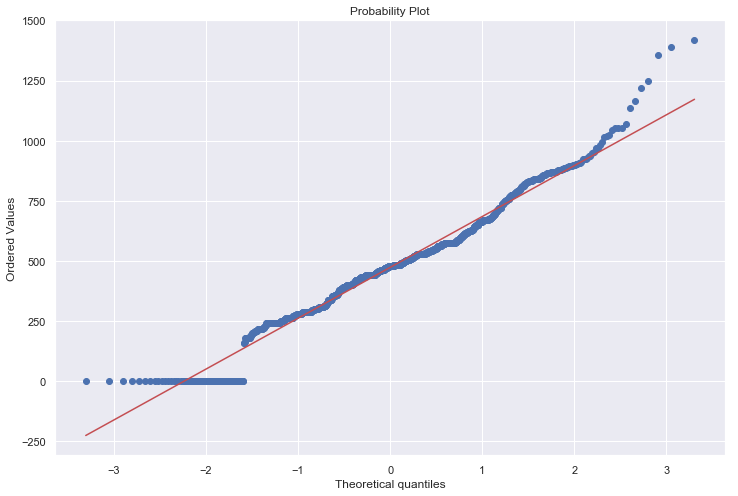

In [39]:
# q-q plot normal distribution 
#sm.qqplot(test, line='45')
fig = plt.figure(figsize=(12,8))
stats.probplot(df['GarageArea'], dist="norm", plot=pylab)
pylab.show()

In [40]:
# Normality test using Shapiro-Wilk Test
# normality test
stat, p = shapiro(df['GarageArea'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p < alpha:
    print('Sample does not look Gaussian (reject H0)')
else:
    print('Sample looks Gaussian (fail to reject H0)')


Statistics=0.975, p=0.000
Sample does not look Gaussian (reject H0)


## 1.6. Choosing Strong Correlation (Independent to Dependent feature )

In [41]:
#module
def strong_corr(df, ycol=None):
    '''
    Documentation :
    --------------
    * Df   : Dataset name
    * ycol : The target column of the dataframe
    '''
    df_num_corr = df.corr()[ycol][:-1] # -1 because the latest row is SalePrice
    strong_corr = df_num_corr[abs(df_num_corr) > 0.6].sort_values(ascending=False)
    corr = pd.Series(strong_corr, name='Storng Corr')
    table = pd.concat([corr], axis = 1) 
    
    return table 


In [42]:
#Strong Correlation 
# 1. define df
dataframe = df

# 2. define target of df
ycol = 'SalePrice'

# 3. Strong Correlation 
strong_corr(dataframe,ycol)

,Storng Corr
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852


## 1.7. Detection Outliers

In [43]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers 

In [46]:
detect_outliers(df, 1, ['GarageArea'])

[]

# 2.  Standard Methode of EDA 

Before visualization , we will give image for visualization color  

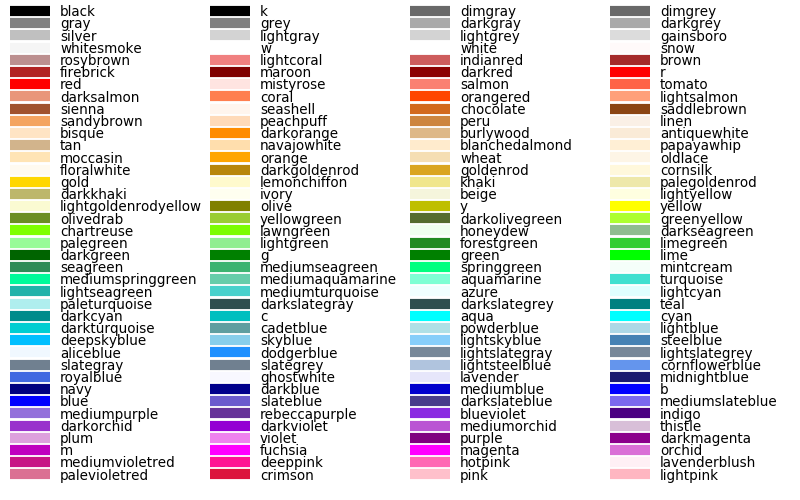

In [37]:
# color option in color seaborn function 
from IPython.display import Image
color = Image(filename = '100_Color_names_python.png', width= 850, height = 850)
color

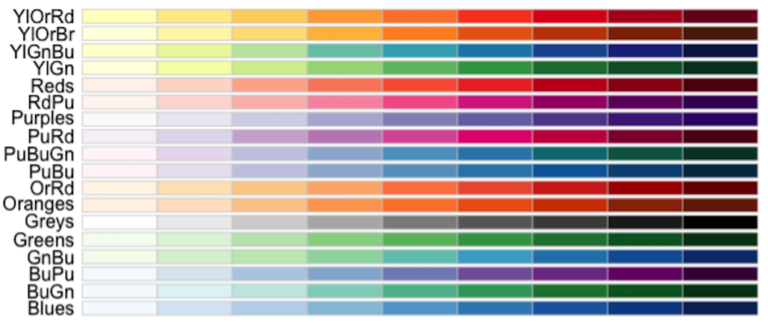

In [38]:
# palatte option in pallate seaborn function  
palette = Image(filename = 'color.png', width= 600, height = 600)
palette

## 2.1. Univariate Analisys

Univariate analysis is basically the simplest form of data analysis or visualization where we are only concerned with analyzing one data attribute or variable and visualizing the same (one dimension)

In [39]:
#Univariat Analisys
def Univariate_plot(df, column, vartype, hue = None ):
    '''
    Documentation :
    Univariate function will plot the graphs based on the parameters.
    * df      : dataframe name
    * column  : Column name
    * vartype : variable type : continuos or categorical
                (0) Continuos/Numerical   : Distribution, Violin & Boxplot will be plotted.
                (1) Categorical           : Countplot will be plotted.
    * hue     : It's only applicable for categorical analysis.
    '''
    sns.set(style="darkgrid")
      
    if vartype == 0:
        fig, ax=plt.subplots(nrows = 3, ncols=1,figsize=(12,12))
        # Distribution Plot
        ax[0].set_title("Distribution Plot",fontsize = 10)
        sns.distplot(df[column], kde=False, fit=stats.gamma, color='darkblue', label = column, ax=ax[0])
        
        # Violinplot 
        ax[1].set_title("Violin Plot",fontsize = 10)
        sns.violinplot(data= df, x=column, color = 'limegreen', inner="quartile", orient='h', ax=ax[1])
        
        #Boxplot
        ax[2].set_title("Box Plot",fontsize = 10)
        sns.boxplot(data =df, x=col,color='cyan',orient="h",ax=ax[2])
        
        fig.tight_layout()
        
    if vartype == 1 :
        #Count plot 
        fig = plt.figure(figsize=(12,6))
        plt.title('Count Plot',fontsize = 20)
        ax=sns.countplot(data=df, x=column, palette="Blues_r")
        ax.set_xlabel(column, fontsize = 15)
        ax.tick_params(labelsize=12)

### 2.1.1. Numerical Features

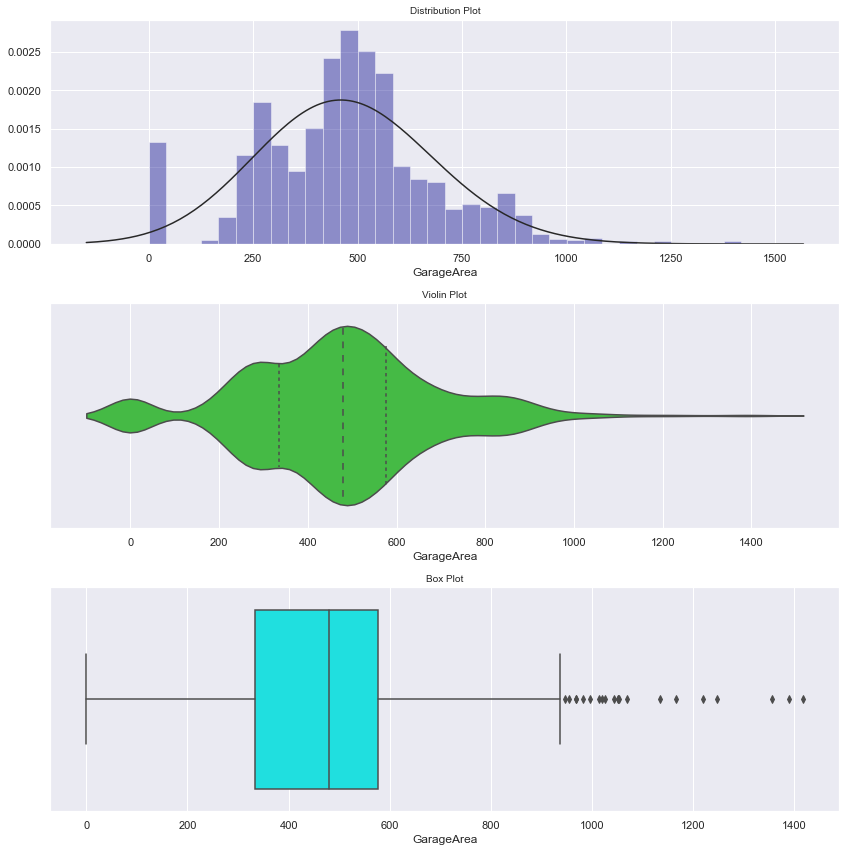

In [40]:
# 1. Define Dataframe
dataframe =df

# 2. Define feature
col = 'GarageArea'

# 3. Vartype 
var_type = 0   
 
#Visualization
Univariate_plot(df=dataframe,column = col, vartype = var_type )

### 2.1.2. Categorical Features

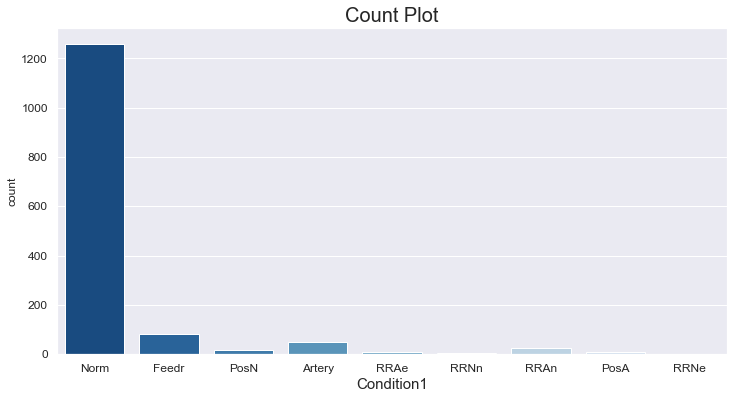

In [41]:
# 1. Define Dataframe
dataframe =df

# 2. Define feature
col = 'Condition1'

# 3. Vartype 
var_type = 1   
 
#Visualization
Univariate_plot(df=dataframe,column = col, vartype = var_type )

## 2.2. Bivariate Analisys

summary statistics for assessing the relationship between each variable in the dataset and the target variable of interest

### 2.2.1. Scatter Plot  for Strong Correlation

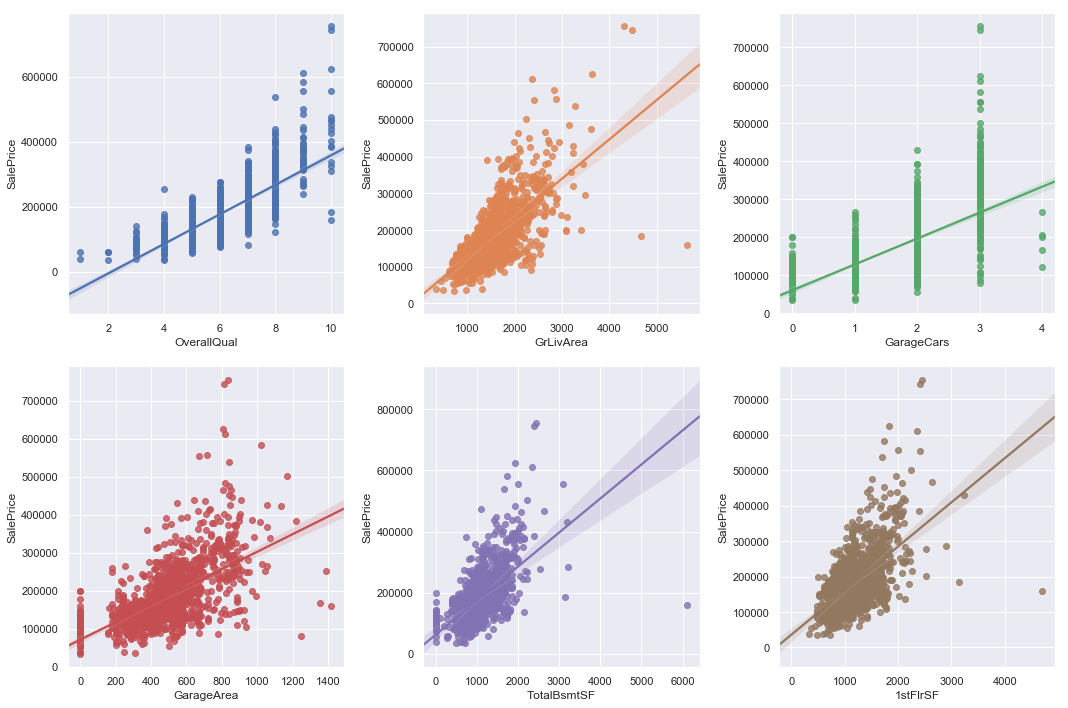

In [42]:
# 1. Define Strong Correlation
df_num_corr = df.corr()['SalePrice'][:-1]
strong_corr = df_num_corr[abs(df_num_corr) > 0.6].sort_values(ascending=False)

# 2. Put the strong correlation into list
strong_corr_list = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']

# 3. Define Dataframe
dataframe = df

# 4. Define target feature
ytarget = 'SalePrice'

#module
def scatter_corr(df, feature_Strong_corr = None, ycolumn = None):
    strong_corr_list = feature_Strong_corr 
    df_strong_corr = df[strong_corr_list]
    
    features_to_analyse = [col for col in strong_corr_list if col in strong_corr]
    features_to_analyse.append(ycolumn)
    features_to_analyse
    
    #Regplot
    fig, ax = plt.subplots(round(len(features_to_analyse)/3), 3, figsize = (15, 10))
    for i, ax in enumerate(fig.axes):
        if i < len(features_to_analyse)-1:
            sns.regplot(x=features_to_analyse[i],y=ycolumn, data=df[features_to_analyse], ax=ax)
    fig.tight_layout()
    
#Visualization 
scatter_corr(dataframe, strong_corr_list, ytarget)

The following function will automatically create the bivariate analysis what we need. The graphs are consist of scatter plot, boxplot, and violin plot.  

In [43]:
def bivariate_plot(df, xcol, ycol, plot_type, hue = None, title= None):
    '''
    Documentation :
    --------------
    Bivariate function will plot the graphs based on the parameters.
    * df        : dataframe name
    * xcol      : X Column name
    * ycol      : Y column name
    * plot_type : plot type : scatter plot, boxplot, and violin plot 
                (0) Scactter plot     : graph between xcol(numerical) and ycol(numerical) 
                (1) Boxplot           : graph between xcol(categorical) and ycol(numerical)
                (2) Violin plot       : graph between xcol(categorical) and ycol(numerical)
    * hue     : name of variables in ``data`` or vector data, optional Grouping variable that 
                will produce points with different colors.
    '''
    if title == None :
        title = 'Bivariate Plot'
        
    # Scatter plot 
    if plot_type == 0 :
        fig = plt.figure(figsize=(12,8))
        ax = sns.scatterplot(data=df, x=xcol, y=ycol, s=150)
        #title of graph
        ax.axes.set_title(title,fontsize = 20 )
        ax.set_xlabel(xcol, fontsize = 15)
        ax.set_ylabel(ycol, fontsize = 15)
        ax.tick_params(labelsize=12)
        
    #boxplot
    if plot_type == 1 : 
        fig = plt.figure(figsize = (12, 7))
        ax =sns.boxplot(data=df, x=xcol, y=ycol, hue = hue)
        plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
        plt.xticks(rotation=45)
        #title of graph
        ax.axes.set_title(title,fontsize = 20 )
        ax.set_xlabel(xcol, fontsize = 15)
        ax.set_ylabel(ycol, fontsize = 15)
        ax.tick_params(labelsize=12)
        
    #violinplot 
    if plot_type == 2 :
        fig =plt.figure(figsize = (12, 7))
        ax = sns.violinplot(data=df, x=xcol, y=ycol,  hue = hue)
        plt.xticks(rotation=45)
        #title of graph
        ax.axes.set_title(title,fontsize = 20 )
        ax.set_xlabel(xcol, fontsize = 15)
        ax.set_ylabel(ycol, fontsize = 15)
        ax.tick_params(labelsize=12)

### 2.2.2. Numerical Features

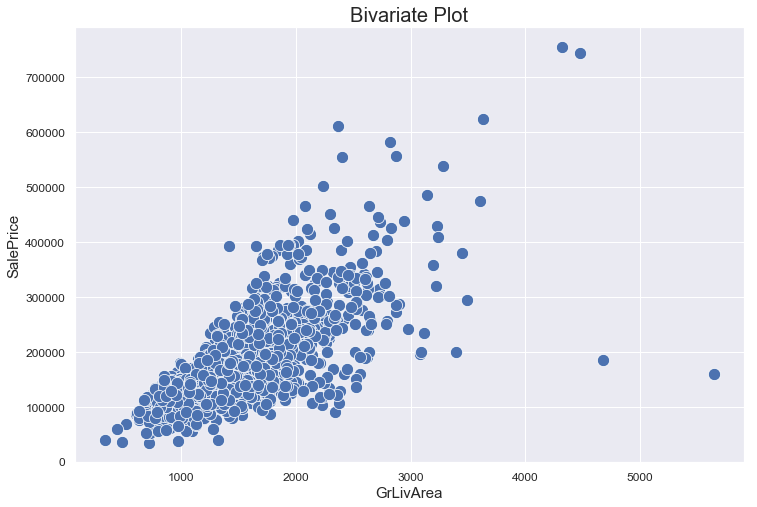

In [44]:
# Sccatter plot For numerical feature 

# 1. Define dataframe
dataframe= df

# 2. Define features and target
x = 'GrLivArea'
y = 'SalePrice'

# 3. Plot type
plottype = 0

# 4. Bivariate Analysis
bivariate_plot(dataframe, x, y, plottype)

### 2.2.3. Categorical Features

### b. Boxplot_Bivariate

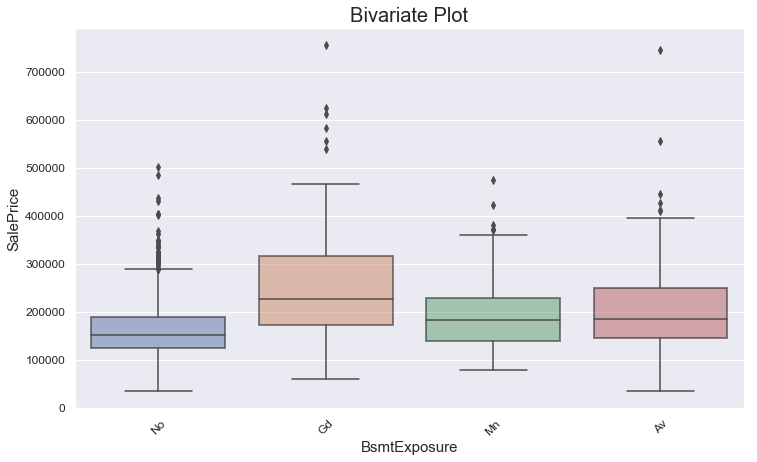

In [45]:
# boxplot For categorical feature 

# 1. Define dataframe
dataframe= df

# 2. Define features and target
x = 'BsmtExposure'
y = 'SalePrice'

# 3. Plot type
plottype = 1

# 4. Bivariate Analysis
bivariate_plot(dataframe, x, y, plottype)

### c . Violinplot Bivariate

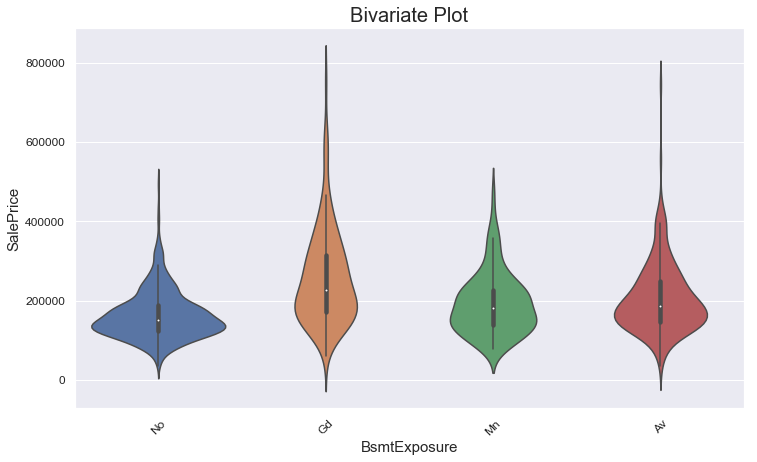

In [46]:
# Violin  For categorical feature 

# 1. Define dataframe
dataframe= df

# 2. Define features and target
x = 'BsmtExposure'
y = 'SalePrice'

# 3. Plot type
plottype = 2

# 4. Bivariate Analysis
bivariate_plot(dataframe, x, y, plottype)

### 2.2.4. Density Plot

### a. Density Plot 

### b. Multi Density Plot 

In [47]:
def multi_density_plot (df, columns, groupBy=None, plot_per_row=None):   
    '''
    Documentation :
    --------------
    * df           : DataFrame name
    * columns      : array of numeric columns' name
    * groupBy      : string
    * plot_per_row : integer
    '''
    if plot_per_row is None:
        plot_per_row = 2
    
    # Counter and plot number
    n = 1
    # Total plots
    size = len(columns)
    # Total rows
    total_row = round(size/plot_per_row + 1, 0)
    
    if groupBy is not None:
        plt.figure(figsize=(20, total_row * 5))
        for column in columns:
            plt.subplot(total_row, plot_per_row, n) # (row, column, panel number)
            df.groupby(groupBy)[column].plot.density(title=column)
            plt.legend()
            n = n + 1
        plt.show()
    else:
        plt.figure(figsize=(20, total_row * 5))
        for column in columns:
            plt.subplot(total_row, plot_per_row, n) # (row, column, panel number)
            df[column].plot.density(title=column)
            plt.legend()
            n = n + 1
        plt.show()

In [48]:
dtype

,float type,int type,object type
0,LotFrontage,Id,MSZoning
1,MasVnrArea,MSSubClass,Street
2,GarageYrBlt,LotArea,Alley
3,NaN,OverallQual,LotShape
4,NaN,OverallCond,LandContour
5,NaN,YearBuilt,Utilities
6,NaN,YearRemodAdd,LotConfig
7,NaN,BsmtFinSF1,LandSlope
8,NaN,BsmtFinSF2,Neighborhood
9,NaN,BsmtUnfSF,Condition1


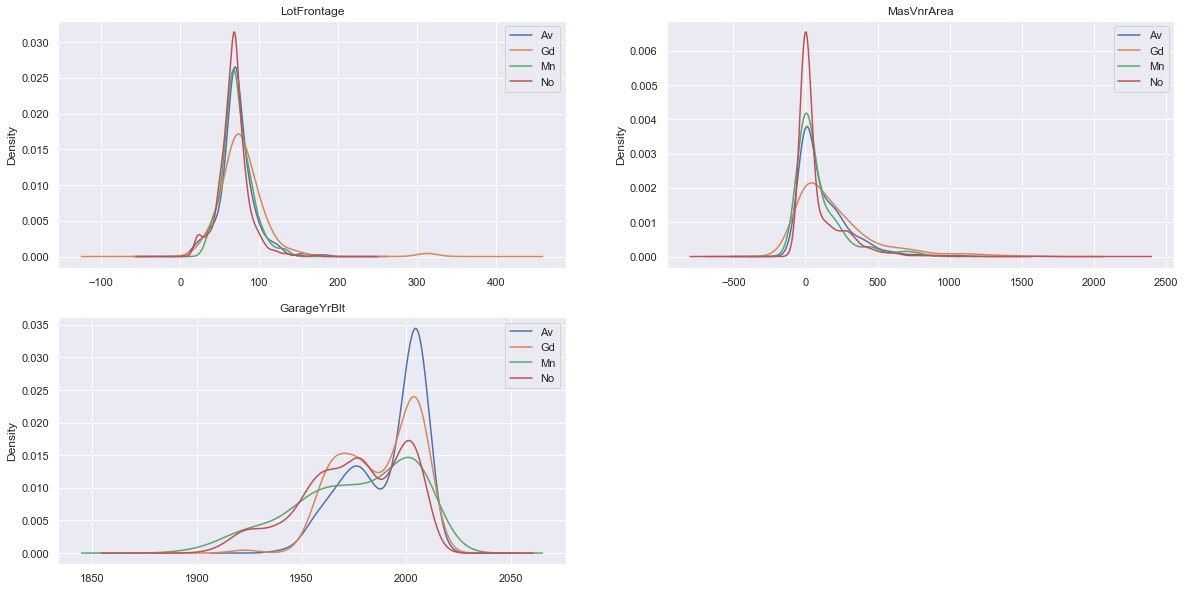

In [49]:
#1. Make List categorical features
float_type=['LotFrontage','MasVnrArea','GarageYrBlt']

#2. Input Dataframe
dataframe = df

#Multi density plot
multi_density_plot(dataframe, float_type, 'BsmtExposure')

## 2.3. Multivariate Analysis

Multivariate visualizations to understand interactions between different fields in the data

In [50]:
def multivariate(df, column, plot_type ):
    '''
    Documentation :
    --------------
    Multivvariate function will plot the graphs based on the parameters.
    * df      : dataframe name
    * column  : Column name (array)
    * plot : plot_type : hitmap and pairplot
                (0) Hitmap    : Hitmap graph will be plotted.
                (1) pairplot  : pairplot graph will be plotted.
    '''
    # hitmap plot
    if plot == 0 :
        corrMatt = df[column].corr()
        mask = np.array(corrMatt)
        mask[np.tril_indices_from(mask)] = False
        fig,ax= plt.subplots(figsize=(12,10))
        fig.set_size_inches(20,5)
        sns.heatmap(corrMatt, mask=mask,vmax=0.9, square=True,annot=True)
        
        
    # pairplot 
    if plot == 1 :
        pairplot = sns.pairplot(df[column], size=2, aspect=2,
                                plot_kws=dict(edgecolor="k", linewidth=0.5),
                                diag_kind="kde", diag_kws=dict(shade=True))
        fig = pairplot.fig 
        fig.subplots_adjust(top=0.90, wspace=0.2)
        fig.suptitle('Pairplot', fontsize=15)

### 2.3.1. Hitmap Correlation 

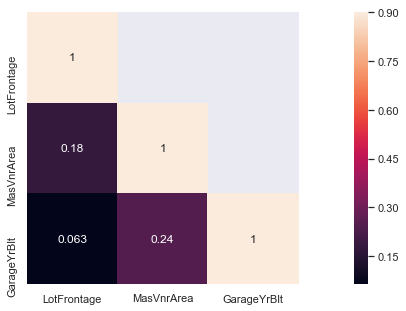

In [51]:
# 1. Define Dataframe
dataframe = df

# 2. Define Column
colname = float_type

# 3. Plot_type
plot = 0

# 4. Visualization 
multivariate(dataframe, colname, plot)

### 2.3.2 Pairplot  

c:\users\triano nurhikmat\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


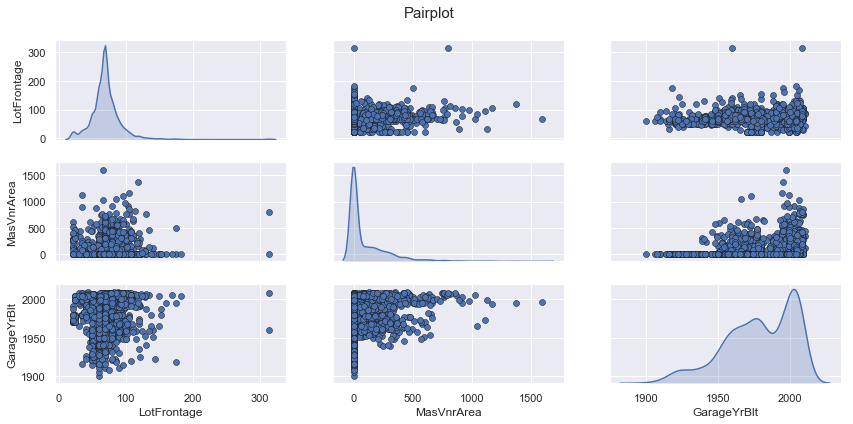

In [52]:
# 1. Define Dataframe
dataframe = df

# 2. Define Column
colname = float_type

# 3. Plot_type
plot = 1

# 4. Visualization 
multivariate(dataframe, colname, plot)

 ## 2.4 Forecasting Visualization 

In [53]:
#Forecasting 
df_forecasting.head()

,Time,GEMS_GEMS_SPENT
0,5/1/17,1199436
1,5/2/17,1045515
2,5/3/17,586111
3,5/4/17,856601
4,5/5/17,793775


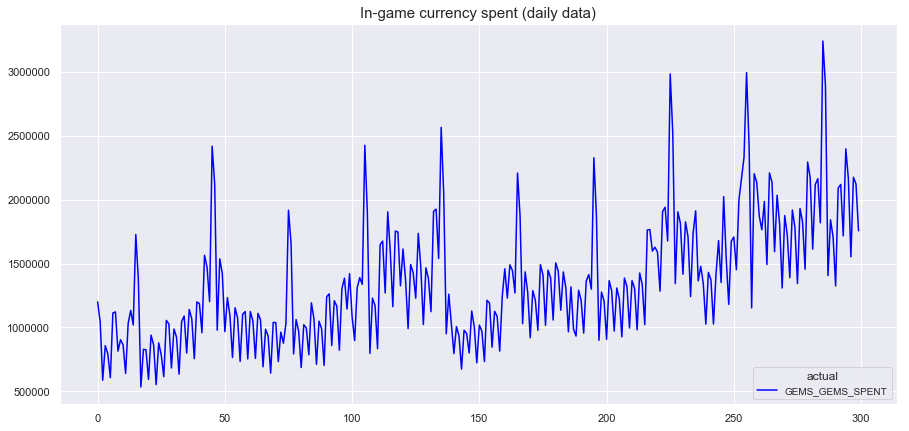

In [54]:
# Visualization for forecasting 

# 1. Define Dataframe 
input_df_forecast = df_forecasting

# 2. Define Feature thath will visualized 
feature = 'GEMS_GEMS_SPENT'

# 3. Define Title of graph 
title = 'In-game currency spent (daily data)'

#module
def timeseries_plot(df, column, title = None):
    '''
    Documentation :
    --------------
    Multivvariate function will plot the graphs based on the parameters.
    * df      : dataframe name
    * column  : Column name 
    * title   : String, Default Time Series Graph 
    '''
    #Default Title
    if title is None:
        title = 'Time Series Graph'
        
    plt.figure(figsize=(15, 7))
    plt.plot(df[feature], color= 'blue')
    plt.title(title, fontsize= 15)
    plt.grid(True)
    plt.legend(title="actual", loc=4, fontsize='small', fancybox=True)
    
#visualization
timeseries_plot(input_df_forecast,feature, title)

## 2.7. Correlation

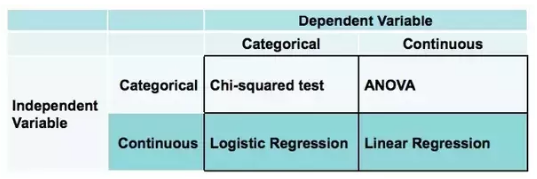

In [56]:
correlation= Image(filename = 'Correlation.PNG', width= 600, height = 600)
correlation

### 2.6.1. Correlation Between Independent (Categoric) & Dependent (Categoric) = Chi-Square test

The Chi-Square test of independence is used to determine if there is a significant relationship between two nominal (categorical) variables.  The frequency of each category for one nominal variable is compared across the categories of the second nominal variable.

Hypothesis:

H0 (Null hypothesis)        : Assumes that there is no association between the two variables.

H1 (Alternative hypothesis) : Assumes that there is an association between the two variables.

In [57]:
# Seperate the features based on types of data
categorical_list = []
numerical_list = []

#Define dataframe
dataframe = df

# module
def dtypes_list(df):
    '''
    Summary :
    * 1. Do iteration for each feature to define which one categorical and nummerical feature. 
    * 2. Columns in dataframe will be seperated based on the dtypes
    * 3. All of the column will be entered to the list that have been created
    '''
    for col in df.columns.tolist():
        if df[col].dtype=='object':
            categorical_list.append(col)
        else:
            numerical_list.append(col)
    
    #make dataframe that have two feature, that is categorical and numerical feature
    categorical = pd.Series(categorical_list, name='Categorical Feature')
    numerical = pd.Series(numerical_list, name='Numerical Feature')
    df_dtypes = pd.concat([categorical,numerical], axis=1)
    
    return df_dtypes
    

#input df to the module 
dtypes_list(dataframe)


,Categorical Feature,Numerical Feature
0,MSZoning,Id
1,Street,MSSubClass
2,LotShape,LotFrontage
3,LandContour,LotArea
4,Utilities,OverallQual
5,LotConfig,OverallCond
6,LandSlope,YearBuilt
7,Neighborhood,YearRemodAdd
8,Condition1,MasVnrArea
9,Condition2,BsmtFinSF1


In [58]:
# Df categoric 
df_categ_list = df[categorical_list]
df_categ_list.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [59]:
#Module Chi-square
def ChiSquare_Test(df, ycol, xcol, alpha):
    '''
    Documentation : 
    --------------
    * df     : Dataframe Name
    * ycol   : y target (Categorcal Variable)
    * xcol   : x target array (Categorical Variable)
    * alpha  : Significance Level (0.1, 0.05, 0.01)
    
    ex:
    # 1. Define Dataframe
    df_categ = df_categ_list
    
    # 2. Input y column  
    y = 'SaleType'
    
    # 3. Input X columns
    x =['Street','LandContour','LandSlope']
   
   # 4. Significance Level 
    a = 0.05
    
    # 5. Chi-Square Analisys 
    ChiSquare_Test(df = df_categ_list, ycol=y, xcol= x, alpha= a)
    '''
    result = {}
    
    #Looping for every x variable in Dataframe
    for x in xcol :
        crosstab = pd.crosstab(df[ycol],df[x])
        _, p, _, _ = chi2_contingency(crosstab)
        
        #logic
        if p <= alpha :
            result[x] = 'Correlated'
        else :
            result[x] = 'Not Correlated'
    
    #The result will be created to the pandas dataframe 
    df = pd.DataFrame.from_dict(result, orient='Index', columns=['Decision'])
    df.index.name='Colname'
    
    return df

In [60]:
# 1. Define Dataframe
df_categ = df_categ_list
# 2. Input y column  
y = 'SaleType'

# 3. Input X columns
x =['Street','LandContour','LandSlope']

# 4. Significance Level 
a = 0.05

# 5. Chi-Square Analisys 
ChiSquare_Test(df = df_categ_list, ycol=y, xcol= x, alpha= a)

,Decision
Colname,
Street,Correlated
LandContour,Not Correlated
LandSlope,Not Correlated


### 2.6.2. Correlation Between Independent (Categoric) & Dependent (Numeric) = ANOVA

In [61]:
df=pd.read_csv('correlation.csv')
df

,jk,obat,tb
0,L,A,178
1,P,A,171
2,P,B,171
3,P,B,168
4,L,C,176
5,L,B,178
6,L,C,173
7,P,A,160
8,P,A,171
9,P,B,168


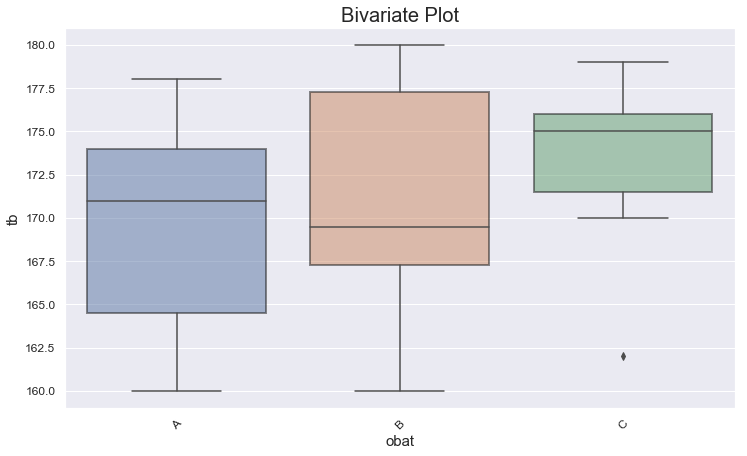

In [62]:
bivariate_plot(df, xcol='obat',ycol='tb',plot_type=1)

In [65]:
anova_model = ols('tb ~ obat', data=df).fit()
anova_model

In [66]:
aov_table = sm.stats.anova_lm(anova_model, typ=2)
print(aov_table)

              sum_sq    df        F    PR(>F)
obat       45.228896   2.0  0.53536  0.594034
Residual  802.589286  19.0      NaN       NaN


### 2.6.3. Correlation Between Independent (Numeric) & Dependent (Categoric) = Logistic Regression 

In [ ]:
#ON PROGRESS

### 2.6.4. Correlation Between Independent (Numeric) & Dependent (Numeric) = Linear Regression 

In [ ]:
#ON PPROGRESS